In [1]:
# 매직명령어
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### 기본차트 그리기 : plot() / show()

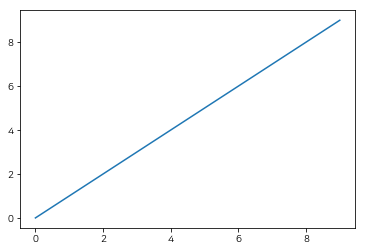

In [2]:
data = np.arange(10)
# plot(x, y)
plt.plot(data)
plt.show()

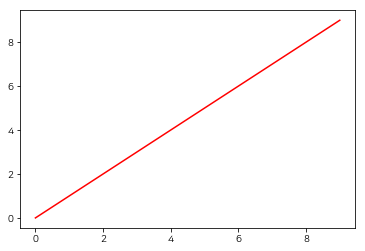

In [3]:
# 'r' : red
plt.plot(data, 'r')
plt.show()

### 산점도(산포도) : plot(x,y)
- scatter()

In [4]:
data = []

for i in range(100):
    x = np.random.normal(0, 1)
    y = x * 0.1 + 0.2 + np.random.normal(0, 1)
    data.append([x, y])

In [5]:
x_data = [v[0] for v in data]
y_data = [v[1] for v in data]

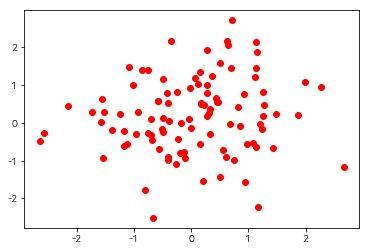

In [6]:
plt.plot(x_data, y_data, 'ro')
plt.show()

### 화면에 여러개의 그래프를 그리기
- figure()
- add_subplot()

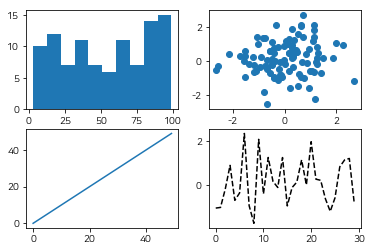

In [9]:
# figure 객체
fig = plt.figure()

# 2 * 2 열로 나누어 4개의 그래프를 그린다.
x1 = fig.add_subplot(2, 2, 1) # ([행], [열], [영역번호])
x2 = fig.add_subplot(2, 2, 2)
x3 = fig.add_subplot(2, 2, 3)
x4 = fig.add_subplot(2, 2, 4)

# data 생성
# 1 ~ 100 숫자 중 난수 정수를 발생, 100
data = np.random.randint(1, 100, 100)

x1.hist(data)

x2.scatter(x_data, y_data)

x3.plot(np.arange(50))

# 'b': blue, 'k': black
x4.plot(np.random.randn(30), 'k--')

plt.show()

### 하나의 차트에 여러개의 그래프를 담는 작업

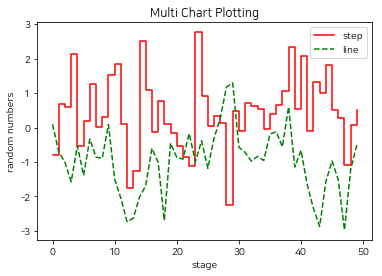

In [18]:
fig = plt.figure()
graph = fig.add_subplot(1, 1, 1)

x = np.random.randn(50)
y = np.random.randn(50).cumsum()

# 계단형 그래프
graph.plot(x, color='r', label='step', drawstyle='steps-post')

# 선 스타일 - 라인스타일 '--' 같은 것을 넣으려면 color= 없어야함
graph.plot(y, 'g--', label='line')

# 범례 - loc으로 위치 지정
# 0: 'best', 1: 'upper right', 2: 'upper left'
# 3: 'lower left', 4: 'lower right', 5: 'right'
plt.legend(loc='best')

# 차트 제목
plt.title('Multi Chart Plotting')

# 축 레이블(축 제목)
plt.xlabel('stage')
plt.ylabel('random numbers')

plt.show()

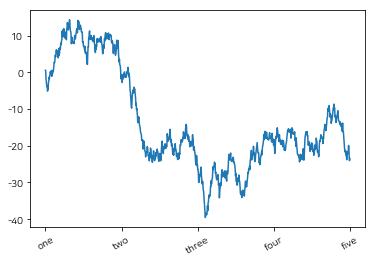

In [25]:
# figure 객체
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30)
plt.show()

### Pandas 객체를 통한 시각화

In [26]:
#from pandas import Series, DataFrame
ser = pd.Series(np.random.randn(10),
               index = np.arange(0, 100, 10))

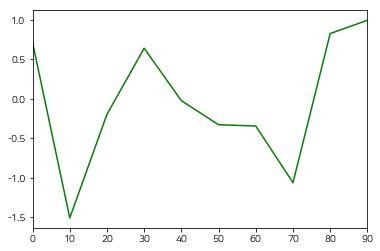

In [27]:
ser.plot(color='g')
plt.show()

In [28]:
df = pd.DataFrame(np.random.randn(10, 4),
                 columns=['one', 'two', 'three', 'four'])
df

,one,two,three,four
0,1.289013,-0.388034,-1.020538,0.350374
1,-0.393186,-1.260576,-0.404050,-0.646144
2,0.130385,-0.866090,-0.019115,1.491175
3,0.796087,0.459985,-0.013962,0.828251
4,0.753344,-0.711435,0.531358,0.424733
5,1.093900,1.087863,-0.414171,-0.542292
6,-1.391622,2.309140,-0.641918,-0.614080
7,0.296057,-0.042945,1.200482,-0.244163
8,0.104076,0.492548,-0.424163,0.405579
9,-0.171427,1.748180,0.421887,2.058930


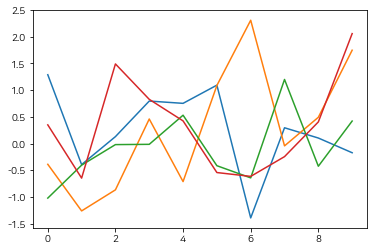

In [38]:
plt.plot(df)
plt.show()

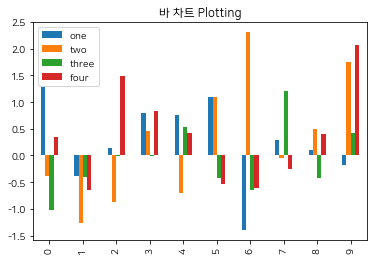

In [31]:
# kind = 'bar'
df.plot(kind='bar', title='바 차트 Plotting')
plt.show()

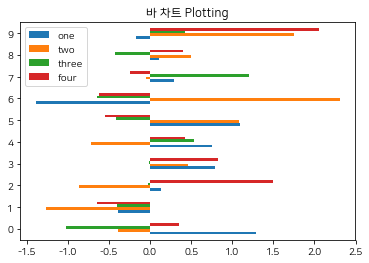

In [33]:
# kind = 'barh' 가로막대
df.plot(kind='barh', title='바 차트 Plotting')
plt.show()

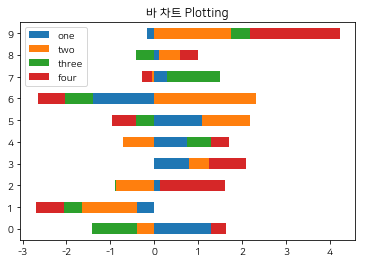

In [34]:
# kind = 'barh', stacked=True 누적가로막대
df.plot(kind='barh', stacked=True, title='바 차트 Plotting')
plt.show()

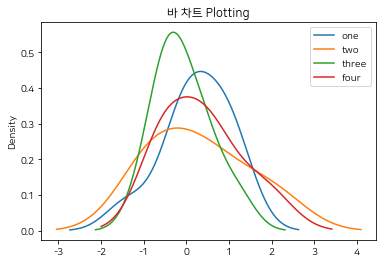

In [35]:
# kind = 'kde', stacked=True 밀도분포곡선
df.plot(kind='kde', stacked=True, title='바 차트 Plotting')
plt.show()

### tips 파일을 이용한 시각화

In [39]:
tips = pd.read_csv('D:/python3/study/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [41]:
# 피처(특성, 칼럼)의 범주 확인
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [42]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [43]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

### 교차 테이블
- day, size를 이용해서 교차 테이블 생성
- 명목적도를 가지는 변수(범주형 변수)만 생성 가능
- crosstab(x,y)

In [44]:
with_table = pd.crosstab(tips['day'], tips['size'])
with_table

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


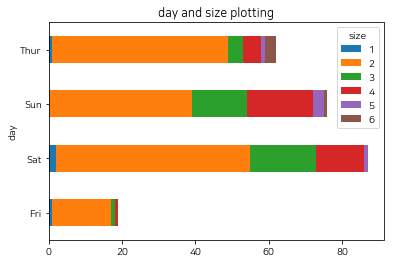

In [45]:
with_table.plot(kind='barh', stacked=True, title='day and size plotting')
plt.show()

### Iris 데이터셋

In [46]:
iris = pd.read_csv('D:/python3/study/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris.tail(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


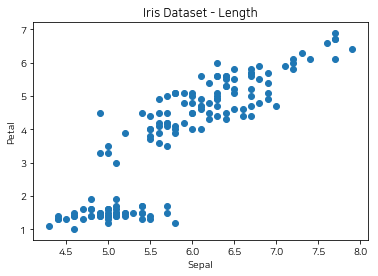

In [49]:
# Sepal.Length & Petal.Length 이용해 산점도 그래프
plt.scatter(iris['Sepal.Length'], iris['Petal.Length'])
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.title('Iris Dataset - Length')
plt.show()

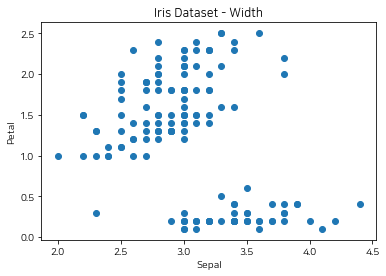

In [52]:
# Sepal.Width & Petal.Width 이용해 산점도 그래프
plt.scatter(iris['Sepal.Width'], iris['Petal.Width'])
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.title('Iris Dataset - Width')
plt.show()

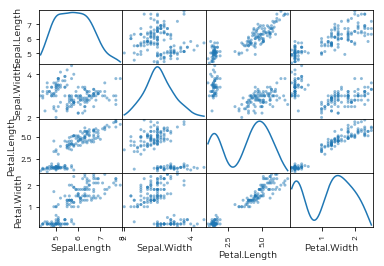

In [55]:
# 산점도 행렬 : scatter_matrix()
iris_col = iris.loc[:, 'Sepal.Length' : 'Petal.Width']
pd.plotting.scatter_matrix(iris_col, diagonal='kde')
plt.show()

In [56]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

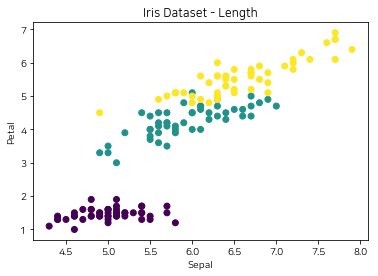

In [58]:
# Sepal.Length & Petal.Length 이용해 산점도 그래프
cols = []
for s in iris['Species']:
    ch = 0
    if s == 'setosa':
        ch = 1
    elif s == 'versicolor':
        ch = 2
    else:
        ch = 3
    cols.append(ch)
    
plt.scatter(iris['Sepal.Length'], iris['Petal.Length'], c=cols)
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.title('Iris Dataset - Length')
plt.show()

### 참고
#### [seaborn](https://seaborn.pydata.org/tutorial/relational.html)
#### [matplotlib](https://matplotlib.org/stable/)

In [67]:
import seaborn as sns
sns.set(style='darkgrid')

In [62]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_ptc,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,0.172069


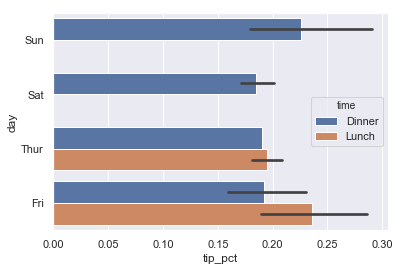

In [69]:
sns.barplot(x='tip_pct', y='day', data=tips, hue='time', orient='h')

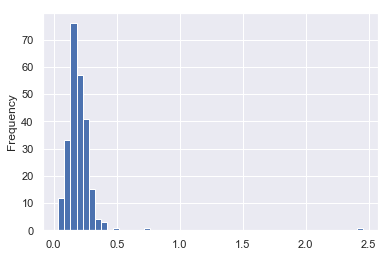

In [70]:
tips['tip_pct'].plot.hist(bins=50)

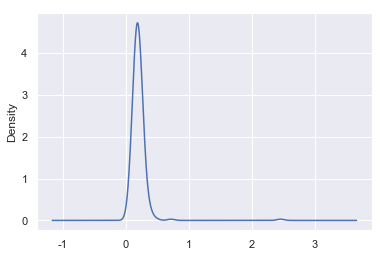

In [71]:
tips['tip_pct'].plot.density()

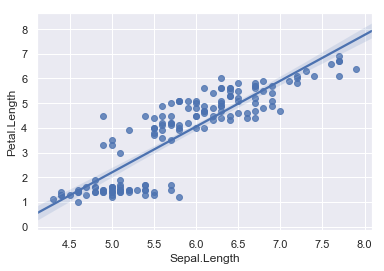

In [72]:
sns.regplot('Sepal.Length', 'Petal.Length', data=iris)

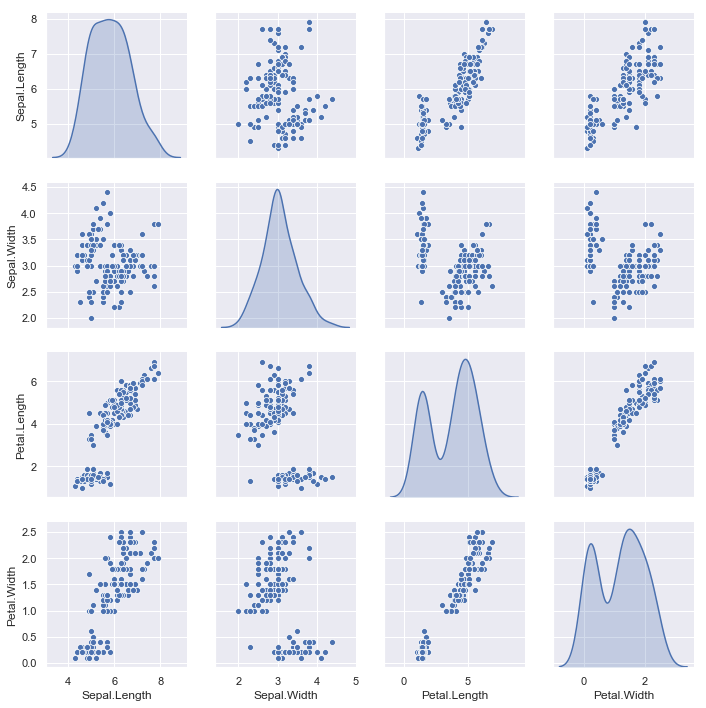

In [73]:
sns.pairplot(iris_col, diag_kind='kde')